In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv
/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv


In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
print("Train shape", train.shape )
train.head()

Train shape (300000, 11)


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:
train2 = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")
print("Train extra shape", train2.shape )
train2.head()

Train extra shape (3694318, 11)


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [6]:
train = pd.concat([train,train2],axis=0,ignore_index=True)
print("Train combined shape",train.shape)

Train combined shape (3994318, 11)


In [7]:
test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
print("Test shape", test.shape )

Test shape (200000, 10)


In [8]:
orig = pd.read_csv("/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv")
print("Original data shape", orig.shape )
orig.head()

Original data shape (52500, 10)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Nylon,Small,2.0,No,Yes,Backpack,Green,13.340058,143.445135
1,Under Armour,Nylon,Large,4.0,Yes,Yes,Tote,Pink,5.918030,72.086319
2,Nike,Nylon,Large,NaN,No,Yes,Messenger,Red,24.088386,29.699631
3,Nike,Nylon,Small,1.0,Yes,No,Messenger,Pink,5.000000,27.181990
4,Under Armour,Leather,Small,8.0,Yes,No,NaN,Black,11.258172,71.953236


In [9]:
orig = orig.groupby("Weight Capacity (kg)").Price.mean()
orig.name = "orig_Price"
orig.head(n=10)

Weight Capacity (kg)
5.000000     80.693646
5.001061     93.862638
5.004444    130.627948
5.004837     76.920155
5.005468    101.682464
5.005485     66.103371
5.006887     83.136924
5.008382    133.934556
5.009264    104.682819
5.009461     75.432553
Name: orig_Price, dtype: float64

In [10]:
train = train.merge(orig, on="Weight Capacity (kg)", how="left")
test = test.merge(orig, on="Weight Capacity (kg)", how="left")
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,orig_Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,39.770555
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,NaN
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,NaN
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,NaN
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,NaN


In [11]:
tmp = train.groupby("Weight Capacity (kg)")[['Price','orig_Price']].agg(["mean","count"])

In [12]:
tmp = tmp.iloc[:,:-1]
tmp.columns = ['Price','count','orig_Price']
tmp = tmp.loc[(tmp['count']>100)&(~tmp.orig_Price.isna())]
print(tmp.shape)
tmp.head()

(3660, 3)


,Price,count,orig_Price
Weight Capacity (kg),,,
5.000000,78.129020,58087,80.693646
5.936885,70.889343,126,43.384706
6.037197,77.639167,164,49.911285
6.049765,74.313717,149,26.110312
6.050151,79.575370,318,111.551165


In [13]:
orig = pd.read_csv("/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv")
orig = orig.loc[(orig["Weight Capacity (kg)"]>5)&(orig["Weight Capacity (kg)"]<30)]
orig.columns = [f"orig_{c}" for c in orig.columns]
train = train.merge(orig.iloc[:,:-1], left_on="Weight Capacity (kg)", right_on="orig_Weight Capacity (kg)", how="left")
train = train.drop("id",axis=1)
test = test.merge(orig.iloc[:,:-1], left_on="Weight Capacity (kg)", right_on="orig_Weight Capacity (kg)", how="left")
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,orig_Price,orig_Brand,orig_Material,orig_Size,orig_Compartments,orig_Laptop Compartment,orig_Waterproof,orig_Style,orig_Color,orig_Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,39.770555,Puma,Nylon,Small,7.0,No,Yes,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import xgboost as xgb
print(f"XGBoost version",xgb.__version__)

XGBoost version 2.0.3


In [15]:
CATS = []
for c in train.columns:
    if train[c].dtype=='object':
        CATS.append(c)
print(f"There are {len(CATS)} categorical columns:")
print( CATS )
NUMS = ['Weight Capacity (kg)','orig_Price']
print(f"There are {len(NUMS)} numerical columns:")
print( NUMS )
FEATURES = CATS + NUMS

There are 14 categorical columns:
['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'orig_Brand', 'orig_Material', 'orig_Size', 'orig_Laptop Compartment', 'orig_Waterproof', 'orig_Style', 'orig_Color']
There are 2 numerical columns:
['Weight Capacity (kg)', 'orig_Price']


In [16]:
import numpy as np
import itertools
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Define manual search space
param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "n_estimators": [1000, 2000, 5000],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [5, 10, 20],
    "gamma": [0.01, 0.1, 1],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}


In [17]:
import random

# Define number of trials
N_TRIALS = 10  # Try 10 different parameter sets

# Generate random combinations of parameters
random_param_sets = random.sample(list(itertools.product(*param_grid.values())), N_TRIALS)

best_rmse = float("inf")
best_params = None

# K-Fold Cross Validation Setup
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

# Loop over each parameter set
for params in random_param_sets:
    params_dict = dict(zip(param_grid.keys(), params))  # Convert tuple to dictionary
    print(f"\nTraining with parameters: {params_dict}")
    
    oof = np.zeros(len(train))  # Out-of-fold predictions

    # Perform K-Fold Training
    for train_index, val_index in kf.split(train):
        X_train, X_valid = train.loc[train_index, FEATURES], train.loc[val_index, FEATURES]
        y_train, y_valid = train.loc[train_index, 'Price'], train.loc[val_index, 'Price']

        # Convert categorical columns
        X_train[CATS] = X_train[CATS].astype("category")
        X_valid[CATS] = X_valid[CATS].astype("category")

        # Train Model
        model = XGBRegressor(**params_dict, device="cuda", enable_categorical=True, early_stopping_rounds=100)
        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)

        # Predict and store RMSE
        preds = model.predict(X_valid)
        oof[val_index] = preds

    # Compute overall RMSE
    rmse = np.sqrt(mean_squared_error(train['Price'], oof))
    print(f"RMSE: {rmse}")

    # Store best parameters
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params_dict

print("\nBest RMSE:", best_rmse)
print("Best Parameters:", best_params)



Training with parameters: {'max_depth': 6, 'learning_rate': 0.05, 'n_estimators': 2000, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 20, 'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.1}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:09:05] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


RMSE: 38.763839849059444

Training with parameters: {'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 2000, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 10, 'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 1}
RMSE: 38.75487074654083

Training with parameters: {'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 5000, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 10, 'gamma': 0.01, 'reg_alpha': 0.1, 'reg_lambda': 10}
RMSE: 38.75481792247173

Training with parameters: {'max_depth': 8, 'learning_rate': 0.2, 'n_estimators': 5000, 'subsample': 1.0, 'colsample_bytree': 0.6, 'min_child_weight': 5, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1}
RMSE: 38.776809551864304

Training with parameters: {'max_depth': 4, 'learning_rate': 0.05, 'n_estimators': 1000, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 5, 'gamma': 0.01, 'reg_alpha': 0, 'reg_lambda': 10}
RMSE: 38.81906856929495

Training with parameters: {'max_depth': 4, 'learning_rate': 0.1,

In [20]:
from sklearn.metrics import mean_squared_error

# Compute RMSE on validation set (if you have true values)
y_valid_pred = best_model.predict(train[FEATURES])
rmse = np.sqrt(mean_squared_error(train['Price'], y_valid_pred))

print(f"Final Validation RMSE: {rmse}")


Final Validation RMSE: 37.831160742436744


In [26]:
%%time

FOLDS = 7
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof = np.zeros((len(train)))
pred = np.zeros((len(test)))

# OUTER K FOLD
for i, (train_index, test_index) in enumerate(kf.split(train)):
    print(f"### Fold {i+1} ###")

    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,'Price']

    X_valid = train.loc[test_index,FEATURES].copy()
    y_valid = train.loc[test_index,'Price']

    X_test = test[FEATURES].copy()

    # CONVERT TO CATS SO XGBOOST RECOGNIZES THEM
    X_train[CATS] = X_train[CATS].astype("category")
    X_valid[CATS] = X_valid[CATS].astype("category")
    X_test[CATS] = X_test[CATS].astype("category")

    # BUILD MODEL
    model = XGBRegressor(
    **best_params, 
    #n_estimators=5000,  
    device="cuda",  
    enable_categorical=True,
    early_stopping_rounds=100
)
    
    # TRAIN MODEL
    COLS = X_train.columns
    model.fit(
        X_train[COLS], y_train,
        eval_set=[(X_valid[COLS], y_valid)],  
        verbose=100,
    )

    # PREDICT OOF AND TEST
    oof[test_index] = model.predict(X_valid[COLS])
    pred += model.predict(X_test[COLS])

pred /= FOLDS

### Fold 1 ###
[0]	validation_0-rmse:38.89653
[100]	validation_0-rmse:38.79652
[200]	validation_0-rmse:38.77476
[300]	validation_0-rmse:38.76136
[400]	validation_0-rmse:38.75131
[500]	validation_0-rmse:38.74260
[600]	validation_0-rmse:38.73723
[700]	validation_0-rmse:38.73228
[800]	validation_0-rmse:38.72890
[900]	validation_0-rmse:38.72606
[1000]	validation_0-rmse:38.72473
[1100]	validation_0-rmse:38.72310
[1200]	validation_0-rmse:38.72313
[1300]	validation_0-rmse:38.72197
[1371]	validation_0-rmse:38.72259
### Fold 2 ###
[0]	validation_0-rmse:38.89267
[100]	validation_0-rmse:38.79125
[200]	validation_0-rmse:38.76781
[300]	validation_0-rmse:38.75194
[400]	validation_0-rmse:38.74234
[500]	validation_0-rmse:38.73457
[600]	validation_0-rmse:38.73086
[700]	validation_0-rmse:38.72860
[800]	validation_0-rmse:38.72674
[900]	validation_0-rmse:38.72491
[1000]	validation_0-rmse:38.72353
[1100]	validation_0-rmse:38.72213
[1196]	validation_0-rmse:38.72323
### Fold 3 ###
[0]	validation_0-rmse:38.91

In [27]:
true = train.Price.values
s = np.sqrt(np.mean( (oof-true)**2.0 ) )
print(f"=> Overall CV Score = {s}")

=> Overall CV Score = 38.74971584696811


In [28]:
# SAVE OOF TO DISK FOR ENSEMBLES
np.save(f"oof",oof)
print("Saved oof to disk")

Saved oof to disk


In [29]:
print(f"\nIn total, we used {len(COLS)} features, Wow!\n")
print( list(COLS) )


In total, we used 16 features, Wow!

['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'orig_Brand', 'orig_Material', 'orig_Size', 'orig_Laptop Compartment', 'orig_Waterproof', 'orig_Style', 'orig_Color', 'Weight Capacity (kg)', 'orig_Price']


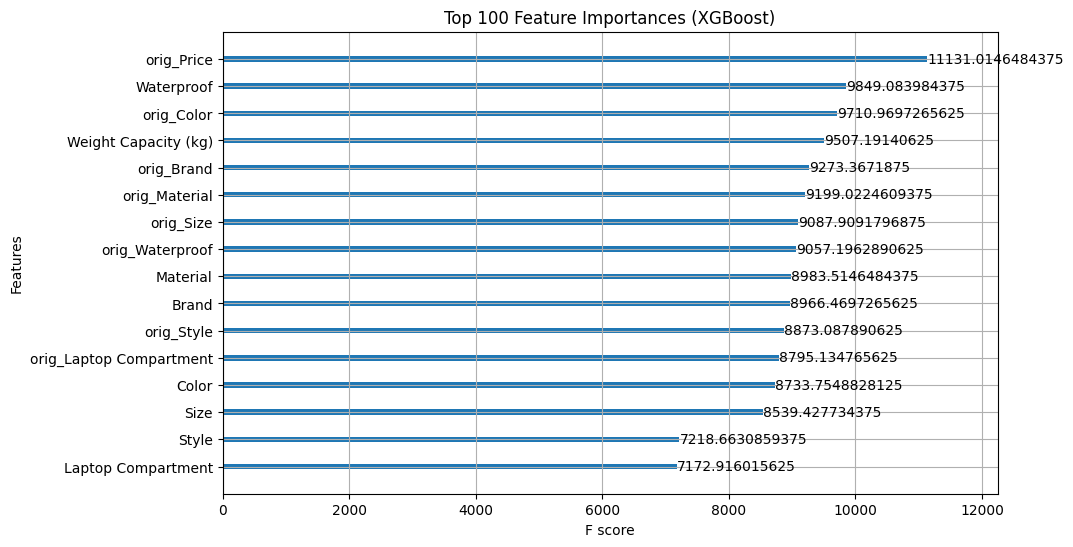

In [30]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=100, importance_type='gain',ax=ax)
plt.title("Top 100 Feature Importances (XGBoost)")
plt.show()

In [31]:
sub = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")
sub.Price = pred
sub.to_csv(f"submission.csv",index=False)
sub.head()

,id,Price
0,300000,76.914304
1,300001,82.544575
2,300002,85.452009
3,300003,85.051535
4,300004,79.911275
